# Exploratory Data Analysis

### 1. Importing libraries and Reading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro,bartlett,levene,mannwhitneyu,ttest_ind
import os

os.chdir('E:/PGP-DSE/Capstone Project/Group 2/OnlineNewsPopularity')

df = pd.read_csv('OnlineNewsPopularity.csv')

### 2. Displaying the dataset

In [2]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### 3. Checking the size of the data

In [3]:
df.shape

(39644, 61)

### 4. Checking the data types of the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

### 5. Descriptive Statistics

In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


### 6. Displaying the column names

In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

### 7. Data Preprocessing

#### a) Removing space on the left of column names

In [7]:
col_names = df.columns
col_names = [i.strip() for i in col_names]

# assigning the new column names
df.columns = col_names

#### b) Fixing names of columns

In [8]:
df.rename(columns = {'self_reference_avg_sharess':'self_reference_avg_shares'}, inplace = True)

#### c) Removing the non-predictive columns

In [9]:
ndf = df.drop(['url','timedelta'], axis = 1)

#### d) Checking null values

In [10]:
ndf.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

### Observations:

- There are 61 features and 39644 records
- There are no null values in the data
- The categorical variables are already one-hot encoded
- The data seems to be clean


### 8. Data Exploration (EDA)

Considering target as both numerical variable (number of shares) and categorical variable (class)

### Distribution of Numerical Variables

In [11]:
# functions for creating plots

def build_hist_plot(num):
    fig = plt.figure(figsize=(15,15))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num)/2,i+1)
        sns.distplot(df[num[i]],kde=False)

    plt.show()

def build_box_plot(num):
    fig = plt.figure(figsize=(15,20))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num)/2,i+1)
        sns.boxplot(df[num[i]])

    plt.show()

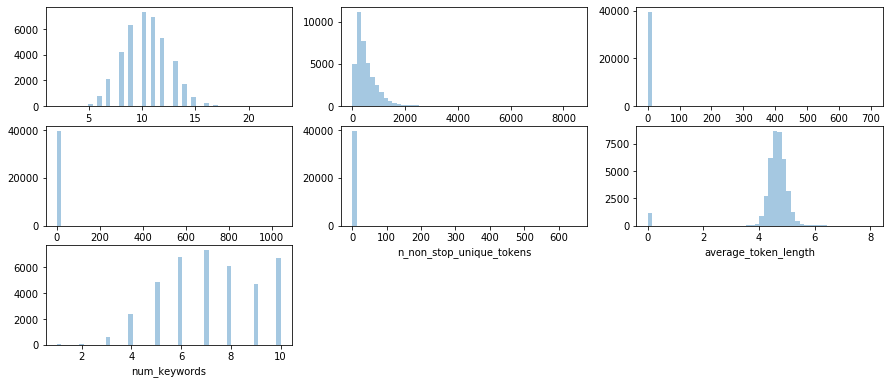

In [12]:
#n_tokens_title:                Number of words in the title
#n_tokens_content:              Number of words in the content
#n_unique_tokens:               Rate of unique words in the content
#n_non_stop_words:              Rate of non-stop words in the content
#n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
# average_token_length:         Average length of the words in the content
# num_keywords:                 Number of keywords in the metadata


words = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens','n_non_stop_words', 'n_non_stop_unique_tokens',
        'average_token_length','num_keywords']

build_hist_plot(words)

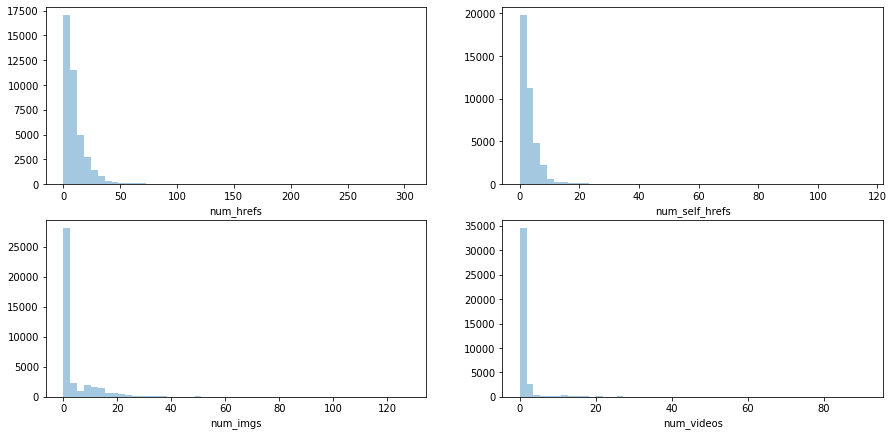

In [13]:
# num_hrefs:                     Number of links
# num_self_hrefs:                Number of links to other articles published by Mashable
# num_imgs:                      Number of images
# num_videos:                    Number of videos
 
href_dc = ['num_hrefs', 'num_self_hrefs','num_imgs','num_videos']

build_hist_plot(href_dc)

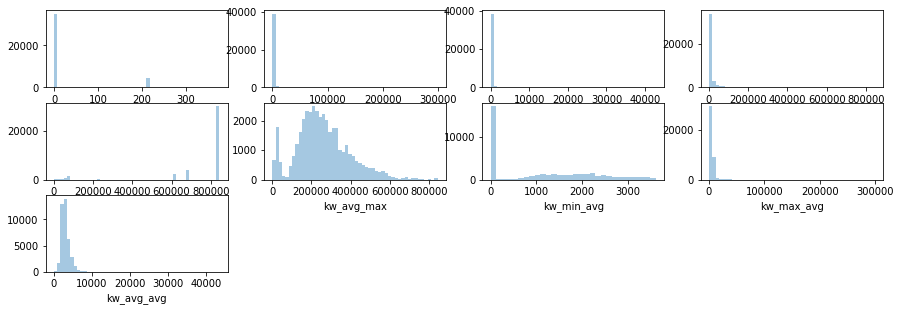

In [14]:
# kw_min_min:                    Worst keyword (min. shares)
# kw_max_min:                    Worst keyword (max. shares)
# kw_avg_min:                    Worst keyword (avg. shares)
# kw_min_max:                    Best keyword (min. shares)
# kw_max_max:                    Best keyword (max. shares)
# kw_avg_max:                    Best keyword (avg. shares)
# kw_min_avg:                    Avg. keyword (min. shares)
# kw_max_avg:                    Avg. keyword (max. shares)
# kw_avg_avg:                    Avg. keyword (avg. shares)


keywords = ['kw_min_min','kw_max_min','kw_avg_min','kw_min_max',
            'kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg']

build_hist_plot(keywords)

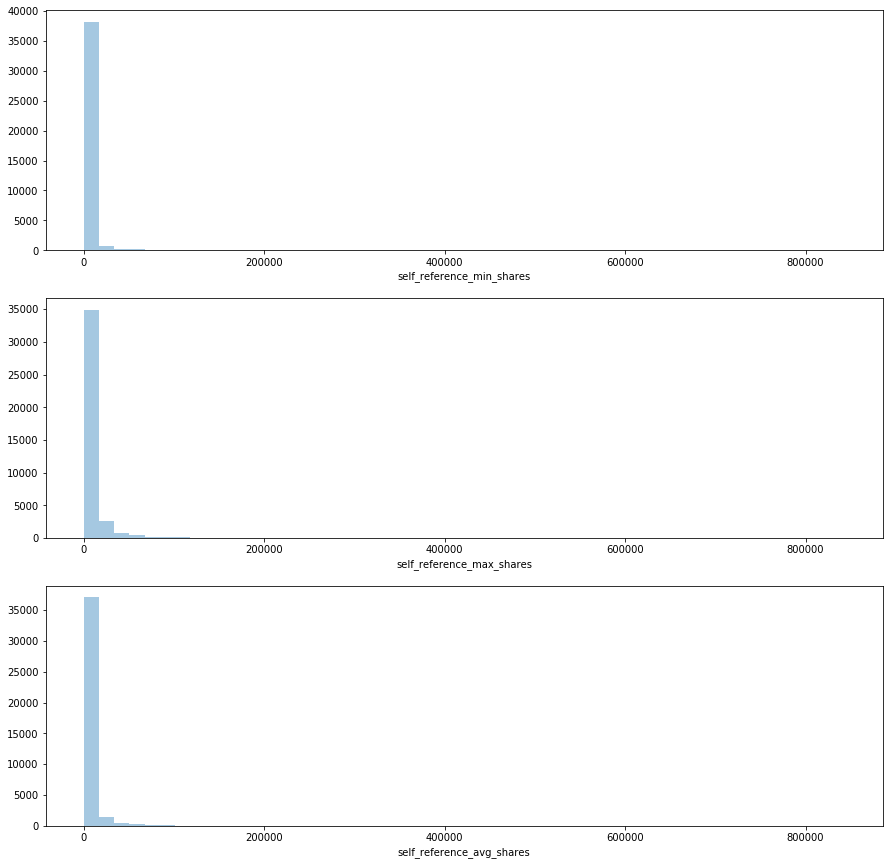

In [16]:
# Distribution of self referenced articles

# self_reference_min_shares:     Min. shares of referenced articles in Mashable
# self_reference_max_shares:     Max. shares of referenced articles in Mashable
# self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable

self_refer = ['self_reference_min_shares','self_reference_max_shares','self_reference_avg_shares']

build_hist_plot(self_refer)

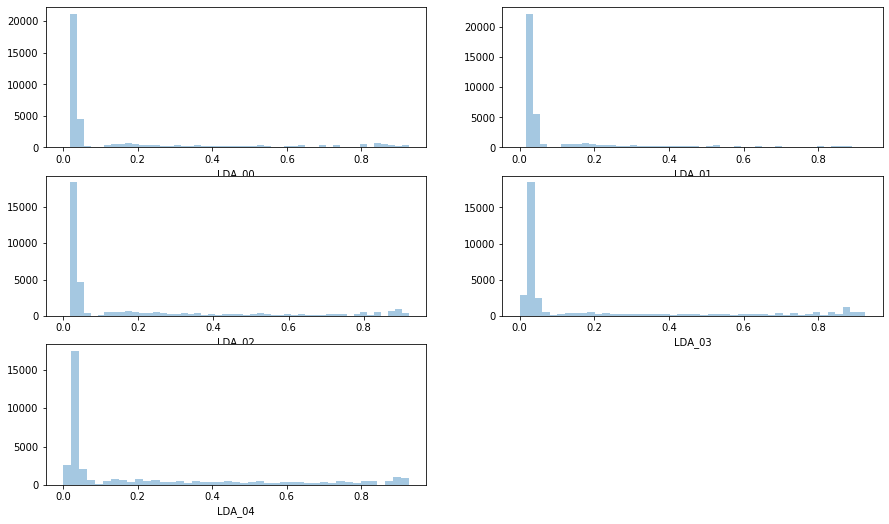

In [17]:
# LDA_00:                        Closeness to LDA topic 0
# LDA_01:                        Closeness to LDA topic 1
# LDA_02:                        Closeness to LDA topic 2
# LDA_03:                        Closeness to LDA topic 3
# LDA_04:                        Closeness to LDA topic 4

lda = ['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']

build_hist_plot(lda)

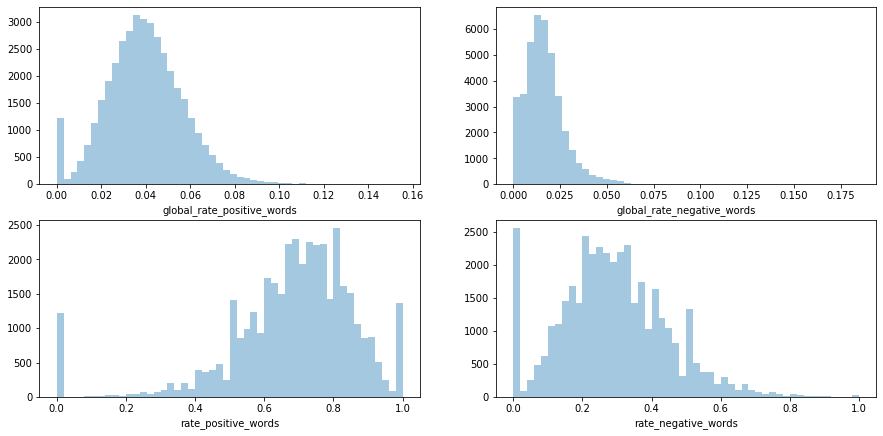

In [18]:
# global_rate_positive_words:    Rate of positive words in the content
# global_rate_negative_words:    Rate of negative words in the content
# rate_positive_words:           Rate of positive words among non-neutral tokens
# rate_negative_words:           Rate of negative words among non-neutral tokens

word_rates = ['global_rate_positive_words','global_rate_negative_words','rate_positive_words','rate_negative_words']

build_hist_plot(word_rates)

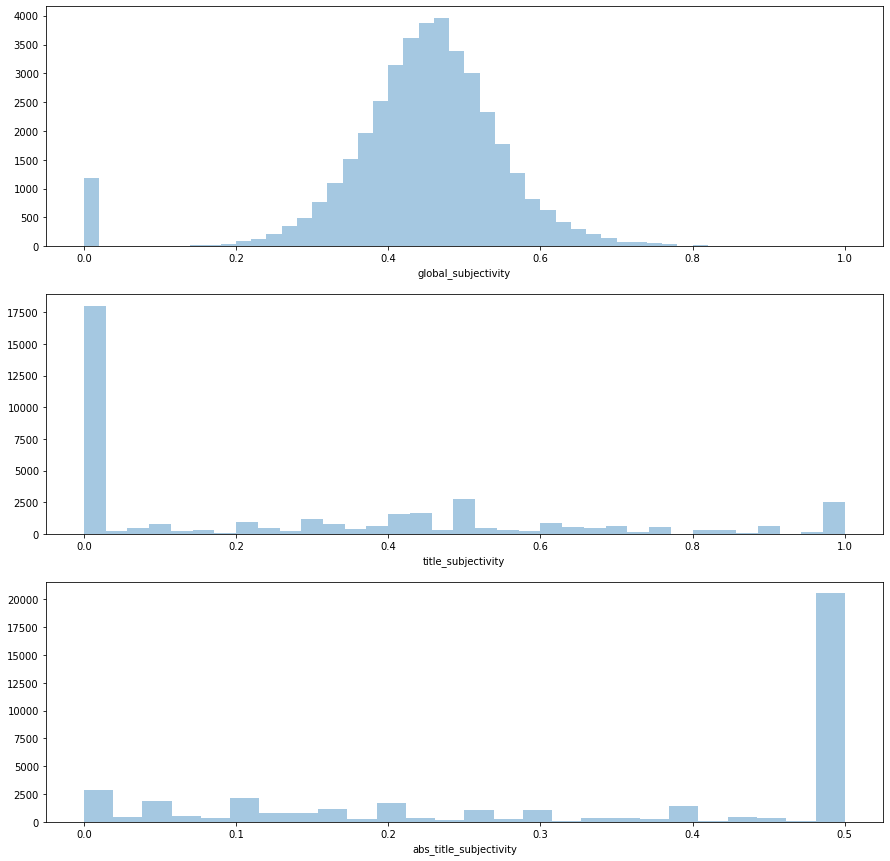

In [19]:

# global_subjectivity:           Text subjectivity
# title_subjectivity:            Title subjectivity    
# abs_title_subjectivity:        Absolute subjectivity level   
    
sub = ['global_subjectivity','title_subjectivity','abs_title_subjectivity'] 

build_hist_plot(sub)

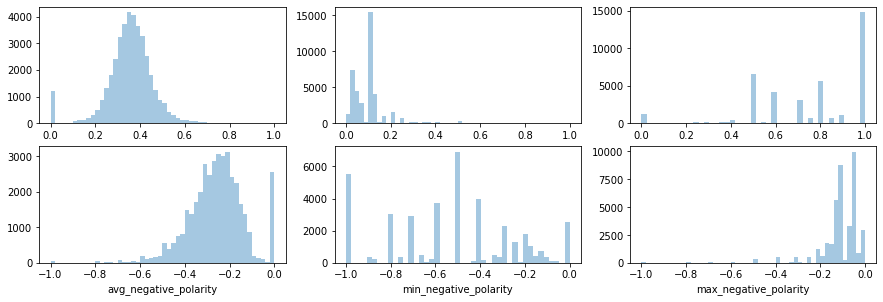

In [20]:
# avg_positive_polarity:         Avg. polarity of positive words
# min_positive_polarity:         Min. polarity of positive words
# max_positive_polarity:         Max. polarity of positive words
# avg_negative_polarity:         Avg. polarity of negative  words
# min_negative_polarity:         Min. polarity of negative  words
# max_negative_polarity:         Max. polarity of negative  words

word_polarity = ['avg_positive_polarity','min_positive_polarity','max_positive_polarity',
                'avg_negative_polarity','min_negative_polarity','max_negative_polarity']

build_hist_plot(word_polarity)

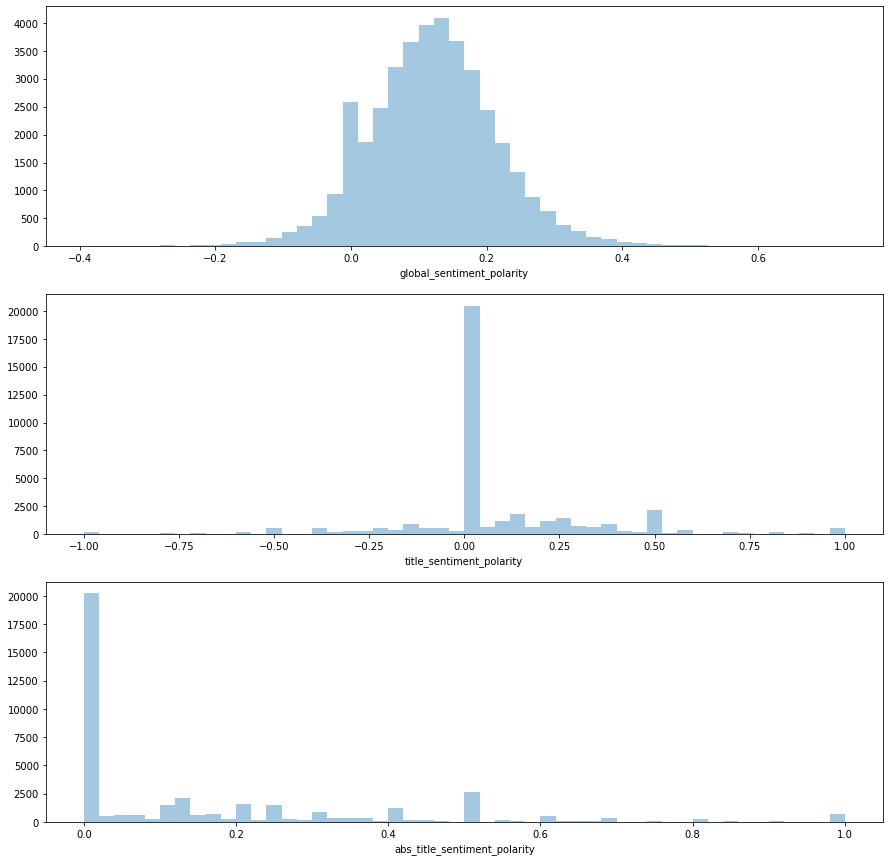

In [21]:
# global_sentiment_polarity:     Text sentiment polarity
# title_sentiment_polarity:      Title polarity
# abs_title_sentiment_polarity:  Absolute polarity level

title_polarity = ['global_sentiment_polarity','title_sentiment_polarity','abs_title_sentiment_polarity']

build_hist_plot(title_polarity)

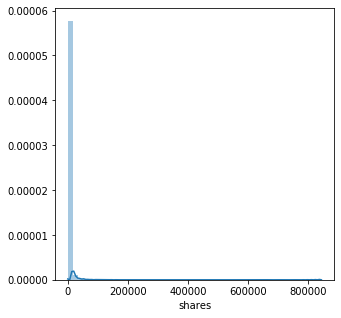

In [22]:
# shares: Number of shares (target)

plt.figure(figsize=(5,5))
sns.distplot(df['shares'],kde=True)
plt.show()

## Inferences:

1. The articles having n_token_titles in range of 7 to 15 seem to be shared most

2. n_tokens_content seem to have non-linear relationship with shares, it seems that the articles which are not lengthy are shared the most
   
3. n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens dont contribute much. As observed the articles having ratio values not more than 1 are shared the most 

4. Articles having avg token length 0 or more than 3 are mostly shared 

5. Articles having no. of keywords 3 or more than 4 are mostly shared 

6. The lower the number of hrefs and self hrefs , the article is likely to be shared

7. The lesser the images or videos in articles, the article is likely to be shared

8. articles having images are shared more as compared to videos  

9. for some articles,n_tokens_content is 0, however
    - some articles have only images or videos
    - some have both images and videos
    - some have only content
    - Some don't have any content, images, videos

##  Analysing n_tokens_content variable

- finding the articles which have a value of 0 or more than 0

In [23]:
# copying original data
ndf = df.copy()

# number of articles
n_articles = [  ndf[(ndf['n_tokens_content'] != 0) & (ndf['num_imgs'] == 0) & (ndf['num_videos'] == 0)].shape[0],
                ndf[(ndf['n_tokens_content'] == 0) & (ndf['num_imgs'] != 0) & (ndf['num_videos'] == 0)].shape[0],
                ndf[(ndf['n_tokens_content'] == 0) & (ndf['num_imgs'] == 0) & (ndf['num_videos'] != 0)].shape[0],
                ndf[(ndf['n_tokens_content'] == 0) & (ndf['num_imgs'] != 0) & (ndf['num_videos'] != 0)].shape[0],
                ndf[(ndf['n_tokens_content'] == 0) & (ndf['num_imgs'] == 0) & (ndf['num_videos'] == 0)].shape[0],
                ndf[(ndf['n_tokens_content'] != 0) & (ndf['num_imgs'] != 0) & (ndf['num_videos'] != 0)].shape[0],
                ndf[(ndf['n_tokens_content'] != 0) & (ndf['num_imgs'] != 0) & (ndf['num_videos'] == 0)].shape[0],
                ndf[(ndf['n_tokens_content'] != 0) & (ndf['num_imgs'] == 0) & (ndf['num_videos'] != 0)].shape[0] ]


article_type = ['only content', 'only images', 'only videos', 'both images and videos', 'No content/image/video', 'All', 
                'content and image', 'content and video']


pd.DataFrame({'article with': article_type, 'n_article': n_articles })

,article with,n_article
0,only content,2036
1,only images,264
2,only videos,716
3,both images and videos,100
4,No content/image/video,101
5,All,9668
6,content and image,22625
7,content and video,4134


## Analysing Links to other or Mashable articles 

- finding the number of num_hrefs, num_self_hrefs, self_reference_min_shares, self_reference_max_shares,self_reference_avg_shares to be included in the article

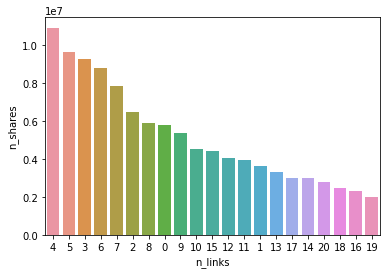

In [24]:
n = []
s = []

# get number of shares for number of links upto 20
for i in range(0,21):
    n.append(i)
    s.append(ndf[ndf['num_hrefs'] == i]['shares'].sum())

# dictionary for link and its shares
links = {'n_links': n, 'n_shares': s}
        
# dataframe for dict
links_df = pd.DataFrame(links,index=None)

# sorting the dataframe
links_df = links_df.sort_values(by='n_shares', ascending = False)

# plotting number of links vs shares
sns.barplot(x = 'n_links', y = 'n_shares',data = links_df, order = links_df['n_links'] )
plt.show()

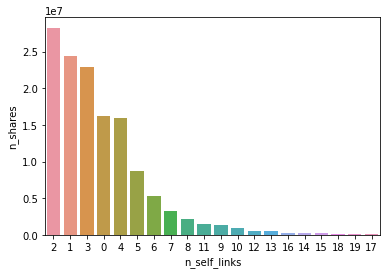

In [25]:
n = []
s = []

# get number of shares for number of links upto 20
for i in range(0,20):
    n.append(i)
    s.append(ndf[ndf['num_self_hrefs'] == i]['shares'].sum())

# dictionary for link and its shares
s_links = {'n_self_links': n, 'n_shares': s}
        
# dataframe for dict
s_links_df = pd.DataFrame(s_links,index=None)

# sorting dataframe
s_links_df = s_links_df.sort_values(by='n_shares', ascending = False)

# plotting number of self links vs shares
sns.barplot(x = 'n_self_links', y = 'n_shares',data = s_links_df, order = s_links_df['n_self_links'])
plt.show()



## Inferences:

1. The total number of links to other articles should be 4,5,3 to gain high shares
2. The total number of links to other mashable articles should be 2,1,3 to gain high shares
3. Also, a significant drop in shares is observed if there are no self_links or other links to the articles
4. The articles having large number of self_links or other links get very few shares

## Analysing number of images or videos
- finding num_imgs, num_videos to be included in any article

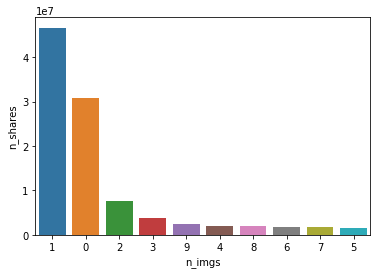

In [26]:
# Number of Images in articles

n = []
s = []

for i in range(0,10):
    n.append(i)
    s.append(ndf[ndf['num_imgs'] == i]['shares'].sum())
    
imgs = {'n_imgs': n, 'n_shares': s}
        
imgs_df = pd.DataFrame(imgs,index=None)

imgs_df = imgs_df.sort_values(by='n_shares', ascending = False)

sns.barplot(x = 'n_imgs', y = 'n_shares',data = imgs_df, order = imgs_df['n_imgs'])
plt.show()

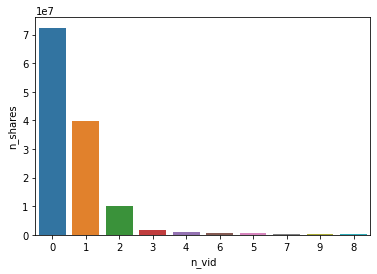

In [27]:
# Number of Videos in the articles

n = []
s = []
for i in range(0,10):
    n.append(i)
    s.append(ndf[ndf['num_videos'] == i]['shares'].sum())
    
vid = {'n_vid': n, 'n_shares': s}
        
vid_df = pd.DataFrame(vid,index=None)

vid_df = vid_df.sort_values(by='n_shares', ascending = False)

sns.barplot(x = 'n_vid', y = 'n_shares',data = vid_df, order = vid_df['n_vid'])
plt.show()



## Inference:
- The number of images and videos in any article can be 0,1,2 to get maximum shares
- This implies that less the images or videos more likely the article will be shared



## Analysing LDA Topics
 - There are 4 topics given: 'LDA_00','LDA_01','LDA_02','LDA_03','LDA_04'
 - finding to which topic each article relates

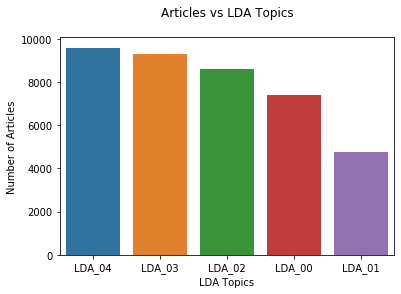

In [28]:
lda = ['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']

# get maximum value from lda topics for each article
lda_max = ndf[lda].max(axis=1)

# get lda topic name for each article where value is maximum
lda_topic = ndf[lda].idxmax(axis=1)

# dataframe for topic and max value
all_lda_articles = pd.DataFrame({'topic': lda_topic, 'val': lda_max})

# adding these values to data
ndf['topic'] = all_lda_articles['topic'] 

# plotting number of articles in each lda topic
sns.barplot(x = ndf['topic'].value_counts().index, y =ndf['topic'].value_counts().values)
plt.xlabel('LDA Topics')
plt.ylabel('Number of Articles')
plt.title('Articles vs LDA Topics\n')
plt.show()

In [29]:
# finding data channel for each article
ndf['data_ch'] = 0

dc = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
      'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']

dc_name = ['lifestyle','entertainment','business','socmed','tech','world']

for c,d in zip(dc,dc_name):
    ndf.loc[ndf[c]==1, 'data_ch'] = d
    
# replacing the articles which do not have any data channel with 'other'
ndf['data_ch'] = ndf['data_ch'].replace(0,'other')

In [30]:
# finding to which topic does the data channel relates and the number of articles for it
lda = ndf['topic'].unique()
dc = []
val = []

for topic in lda:
    dc.append(ndf[ndf['topic'] == topic]['data_ch'].value_counts(normalize = True).idxmax())
    val.append(ndf[ndf['topic'] == topic]['data_ch'].value_counts(normalize = True).max()*100)
    
lda_articles = pd.DataFrame({'topic': lda, 'data_ch': dc, 'article%': val})

lda_articles

,topic,data_ch,article%
0,LDA_00,business,71.662383
1,LDA_04,tech,67.918623
2,LDA_02,world,82.743414
3,LDA_03,other,57.018299
4,LDA_01,entertainment,76.318554


In [31]:
ndf[ndf['topic'] == 'LDA_04']['data_ch'].value_counts(normalize = True)

tech             0.679186
lifestyle        0.142723
world            0.074596
business         0.054251
socmed           0.027647
entertainment    0.013041
other            0.008555
Name: data_ch, dtype: float64

## Inference:
- Higher number of articles are related to the topic 4 where as less articles are related to topic 1 
- The articles with article categories as business, technology, world, entertainment and other are closely related to topic 0, topic 4, topic 2, topic 1 and topic 3 respectively
- More than 10% of the articles having article categories as lifestyle, entertainment, social media and others are slightly related to topic 4, topic 3, topic 0 and topic 1 respectively.

# Distribution of Categorical Variables

In [33]:
# function to plot the categorical variables
def build_count_plot(num):
    fig = plt.figure(figsize=(15,20))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num)/3,i+1)
        sns.countplot(ndf[num[i]])
    plt.show()


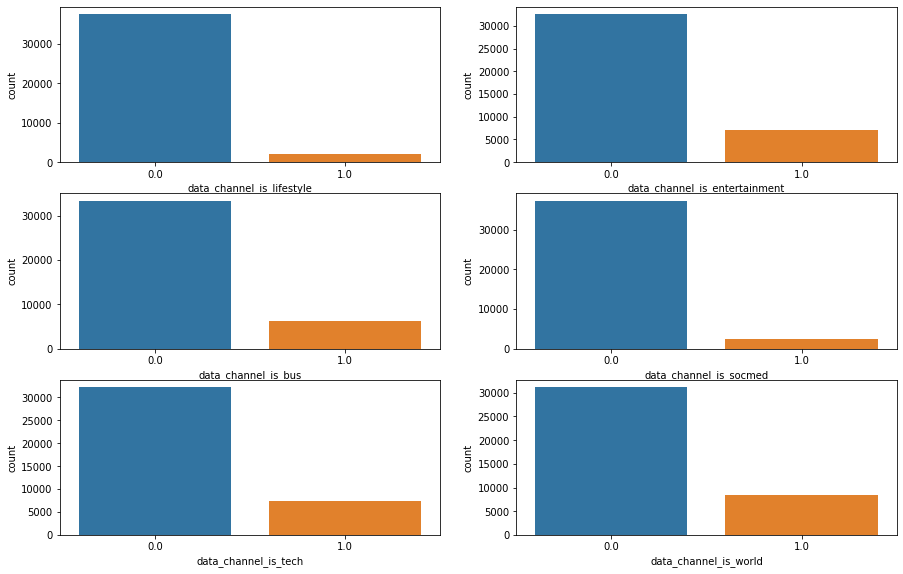

In [34]:
data_channels = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
                 'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']

build_count_plot(data_channels)

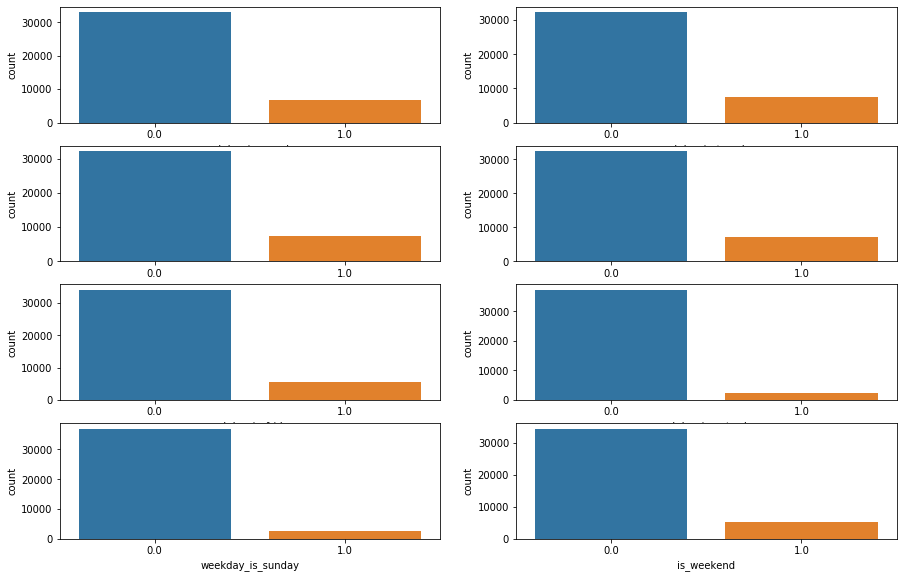

In [35]:
weekdays = ['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday',
           'weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']

build_count_plot(weekdays)

## Inference:

1. Data channels lifestyle and social media have least number of articles
2. World data channel has high number of articles
3. Least number of articles are released on sunday and saturday

## Analysing Data Channels

### Data Channel wise distribution of articles


In [36]:

data_channels = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
                 'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']


channels = ['lifestyle','entertainment','bus','socmed','tech','world']

no_of_articles = []

# get count of articles for each data channel
for dc in data_channels:
    no_of_articles.append(ndf[ndf[dc]==1][dc].value_counts().values[0])

# creating the dataframe for count of articles for each dc
dc_df = pd.DataFrame(no_of_articles,index = channels,columns=['no_of_articles'])

dc_df

,no_of_articles
lifestyle,2099
entertainment,7057
bus,6258
socmed,2323
tech,7346
world,8427


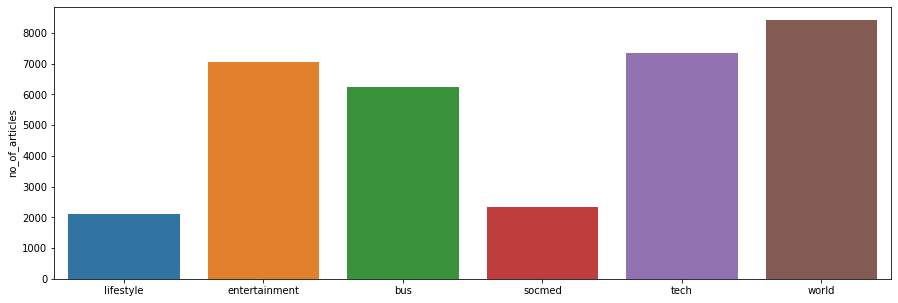

In [37]:
# plotting the above dataframe values
plt.figure(figsize=(15,5))
sns.barplot(x=dc_df.index,y=dc_df['no_of_articles'])
plt.show()

In [38]:
# Number of Articles which do not fall under any of the data channels

ndf[(ndf['data_channel_is_lifestyle']== 0) & (ndf['data_channel_is_entertainment']== 0) & (ndf['data_channel_is_bus']== 0)
    & (ndf['data_channel_is_socmed']== 0) & (ndf['data_channel_is_tech']== 0) & (ndf['data_channel_is_world']== 0 )
    ].shape[0]

6134

### Data Channel wise distribution of articles w.r.t shares

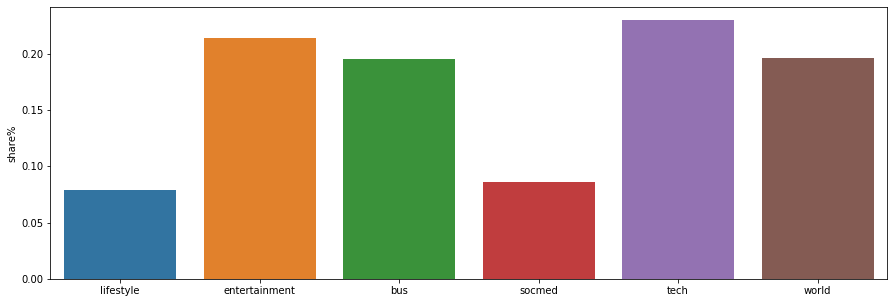

In [39]:
dc_shares = []

# get shares for each dc
for dc in data_channels:
    dc_shares.append(ndf[ndf[dc]==1]['shares'].sum())

# appending shares to existing dataframe
dc_df['no_of_shares'] = dc_shares

# calculating shares%
dc_df['share%'] = dc_df['no_of_shares']/dc_df['no_of_shares'].sum()

# sorting dataframe
dc_df.sort_values(by='share%',ascending=False)

# plot dc vs shares
plt.figure(figsize=(15,5))
sns.barplot(x=dc_df.index,y=dc_df['share%'])
plt.show()



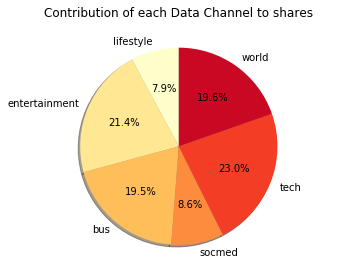

In [40]:
# plotting a pie chart to show contribution of dc in shares in %  

labels = channels
sizes = dc_df['share%']
explode = (0, 0, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
theme = plt.get_cmap('YlOrRd')

ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Contribution of each Data Channel to shares\n')
plt.show()

## Inferences:
    
1. articles related to data channels like lifestyle,social media are very less
2. other channels are having moderate no. of articles
3. data channel world has maximum number of related articles


### Data Channel wise Popularity of articles w.r.t categorical variable

In [41]:
# adding a new column class having values 0 and 1
# depending upon the number of shares 
# as median value is 1400 dividing on the same - 1: shares>1400 | 0:shares<1400

ndf['class'] = ndf['shares'].apply(lambda x: 1 if x>1400 else 0)

ndf['class'].value_counts()


popular_yes = []
popular_no  = []

# get number of popular and unpopular articles for each dc
for dc in data_channels:
    popular_yes.append(ndf[(ndf[dc]==1) & (ndf['class']==1)].shape[0])
    popular_no.append(ndf[(ndf[dc]==1) & (ndf['class']==0)].shape[0])

# calculating values and adding to existing dataframe
dc_df['popular'] = popular_yes
dc_df['not_popular'] = popular_no

dc_df['popular%'] = dc_df['popular']/dc_df['no_of_articles']

dc_df['overall%'] = dc_df['no_of_articles']/dc_df['no_of_articles'].sum()

dc_df['overall_popularity%'] = dc_df['popular']/dc_df['popular'].sum()

dc_df.sort_values(by='popular%',ascending=False)

dc_df

,no_of_articles,no_of_shares,share%,popular,not_popular,popular%,overall%,overall_popularity%
lifestyle,2099,7728777,0.078754,1200,899,0.571701,0.062638,0.075820
entertainment,7057,20962727,0.213603,2644,4413,0.374663,0.210594,0.167056
bus,6258,19168370,0.195319,3029,3229,0.484020,0.186750,0.191382
socmed,2323,8431057,0.085910,1659,664,0.714163,0.069323,0.104821
tech,7346,22568993,0.229970,4359,2987,0.593384,0.219218,0.275415
world,8427,19278735,0.196444,2936,5491,0.348404,0.251477,0.185506


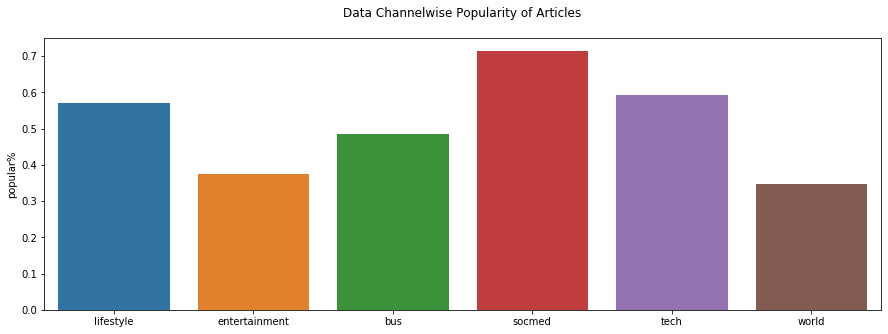

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x=dc_df.index,y=dc_df['popular%'])
plt.title('Data Channelwise Popularity of Articles\n')
plt.show()

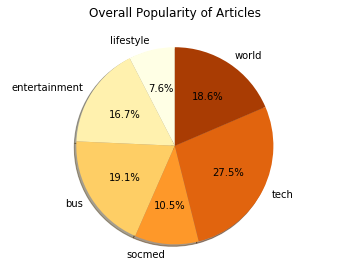

In [43]:
# plotting a pie chart to show popularity %  for each dc 

labels = channels
sizes = dc_df['overall_popularity%']
explode = (0, 0, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
theme = plt.get_cmap('YlOrBr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Overall Popularity of Articles\n')
plt.show()

## Inferences: 
    
1. The data channel world has very low popularity despite of having maximum number of articles

2. Social media data channel has few articles but the popularity is high 

3. Lifestyle has very few articles having high popularity

4. technology has considerable number of articles also, the popularity is high

5. entertainment has good number of articles but not much popular

6. business has considerable number of articles also, the popularity is not so good

7. The world category has highest number of articles but contributes only 19% of the shares and gained popularity of 34% within the category. 

8. Lifestyle and social media categories have least number of articles. 

9. Even though social media category has less articles, it has managed to get high popularity of 71% within the category. 

10. About 6134 articles might be of some other category which is not mentioned in the dataset.

11. Overall popularity of technology related articles is high about 27% as compared to popular articles of other categories

12. Why shares of world related articles are less
    - These articles are lengthy
    - It also contains a large number of images and videos
    - Also, links to differnet articles are too many
    
    This can be improved by:
    - minimizing the imgs,videos, links  to an optimal number.
    - Also, reducing the length of articles

## Analysing Weekdays and Weekend

### Weekday wise distribution of articles


In [44]:

weekdays = ['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday',
           'weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']

day = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday','weekend']

no_of_articles = []

for w in weekdays:
    no_of_articles.append(ndf[ndf[w]==1][w].value_counts().values[0])

w_df = pd.DataFrame(no_of_articles,index = day,columns=['no_of_articles'])
w_df

,no_of_articles
monday,6661
tuesday,7390
wednesday,7435
thursday,7267
friday,5701
saturday,2453
sunday,2737
weekend,5190


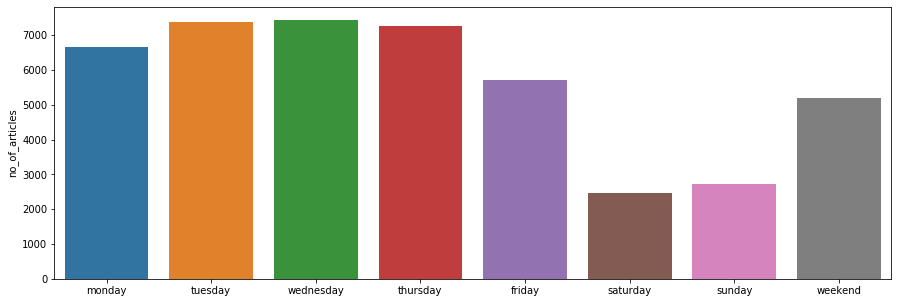

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(x=w_df.index,y=w_df['no_of_articles'])
plt.show()


## Inferences: 
    
1. least articles are published on saturday and sunday

2. a good number of articles are published on weekdays in which tuesday,wednesday and thursday have high values

3. considerable number of articles are published on weekends




### Weekday wise distribution of articles w.r.t shares

In [46]:
w_shares = []

for w in weekdays:
    w_shares.append(ndf[ndf[w]==1]['shares'].sum())

w_df['no_of_shares'] = w_shares

w_df['share%'] = w_df['no_of_shares']/w_df['no_of_shares'].sum()

w_df.sort_values(by='share%',ascending=False)

w_df


,no_of_articles,no_of_shares,share%
monday,6661,24292839,0.156865
tuesday,7390,23666480,0.152820
wednesday,7435,24560819,0.158595
thursday,7267,23098880,0.149155
friday,5701,18728817,0.120936
saturday,2453,10003788,0.064597
sunday,2737,10254829,0.066218
weekend,5190,20258617,0.130815


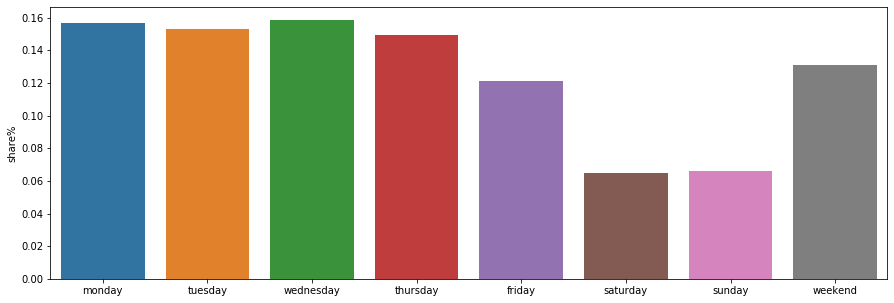

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x=w_df.index,y=w_df['share%'])
plt.show()

## Inference:

1. monday,tuesday,wednesday have almost equal shares
2. thursday,friday,weekend are same shares
3. saturday, sunday equal shares, also equal to weekend

### Weekday wise Popularity of articles


In [48]:
popular_yes = []
popular_no  = []

for w in weekdays:
    popular_yes.append(ndf[(ndf[w]==1) & (ndf['class']==1)].shape[0])
    popular_no.append(ndf[(ndf[w]==1) & (ndf['class']==0)].shape[0])

w_df['popular'] = popular_yes

w_df['not_popular'] = popular_no

w_df['popular%'] = w_df['popular']/w_df['no_of_articles']

w_df['overall%'] = w_df['no_of_articles']/w_df['no_of_articles'].sum()

w_df['overall_pop%'] = w_df['popular']/w_df['popular'].sum()

w_df.sort_values(by='popular%',ascending=False)

w_df

,no_of_articles,no_of_shares,share%,popular,not_popular,popular%,overall%,overall_pop%
monday,6661,24292839,0.156865,3140,3521,0.471401,0.148570,0.136267
tuesday,7390,23666480,0.152820,3359,4031,0.454533,0.164830,0.145771
wednesday,7435,24560819,0.158595,3335,4100,0.448554,0.165834,0.144729
thursday,7267,23098880,0.149155,3382,3885,0.465391,0.162087,0.146769
friday,5701,18728817,0.120936,2865,2836,0.502543,0.127158,0.124333
saturday,2453,10003788,0.064597,1720,733,0.701182,0.054713,0.074643
sunday,2737,10254829,0.066218,1761,976,0.643405,0.061047,0.076422
weekend,5190,20258617,0.130815,3481,1709,0.670713,0.115760,0.151065


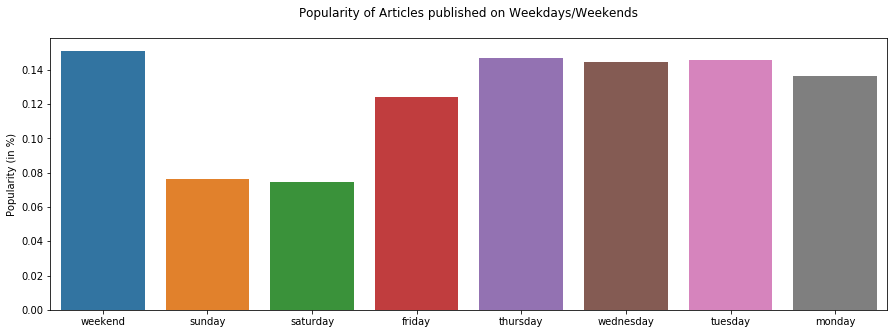

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x=w_df.index,y=w_df['overall_pop%'], order = w_df.index[::-1])
plt.ylabel('Popularity (in %)')
plt.title('Popularity of Articles published on Weekdays/Weekends\n')
plt.show()


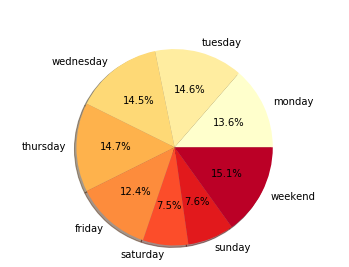

In [50]:
day = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday','weekend']

labels = day
sizes = w_df['overall_pop%']
explode = (0, 0, 0, 0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
theme = plt.get_cmap('YlOrRd')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('\n')
plt.show()


## Distribution of Articles of various Data Channels w.r.t weekdays and weekends

In [51]:
# adding weekday name for each article
weekdays = ['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday',
           'weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']

day = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday','weekend']

for c,d in zip(weekdays,day):
    ndf.loc[ndf[c]==1, 'days'] = d

In [52]:
ndf['days'].value_counts()

wednesday    7435
tuesday      7390
thursday     7267
monday       6661
friday       5701
weekend      5190
Name: days, dtype: int64

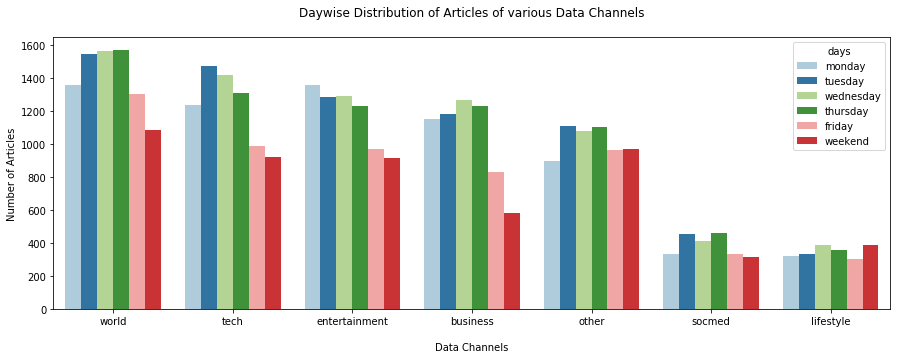

In [53]:
plt.figure(figsize = (15,5))
ax = sns.countplot(ndf['data_ch'],  hue= ndf['days'], order = ndf['data_ch'].value_counts().index, palette = 'Paired' )
plt.ylabel('Number of Articles')
plt.xlabel('\nData Channels')
plt.title('Daywise Distribution of Articles of various Data Channels\n')
plt.show()

## Yearwise Comparison of articles related to data channels

In [54]:
import re

# extracting date from the url variable
ndf['date_published'] = ndf['url'].apply(lambda x: (re.search(r"[0-9].../[0-9]./[0-9].",x)).group())

ndf.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,topic,data_ch,class,days,date_published
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.500000,-0.187500,0.000000,0.187500,593,LDA_00,entertainment,0,monday,2013/01/07
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.000000,0.000000,0.500000,0.000000,711,LDA_00,business,0,monday,2013/01/07
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.000000,0.000000,0.500000,0.000000,1500,LDA_04,business,1,monday,2013/01/07
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.000000,0.000000,0.500000,0.000000,1200,LDA_02,entertainment,0,monday,2013/01/07
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.454545,0.136364,0.045455,0.136364,505,LDA_04,tech,0,monday,2013/01/07


In [55]:
ndf['date_published'].describe()

count          39644
unique           720
top       2014/10/09
freq             105
Name: date_published, dtype: object

In [56]:
# converting date to datetime 
ndf['date_published'] = pd.to_datetime(ndf['date_published'])

# get year from the date
ndf['year']=pd.DatetimeIndex(ndf['date_published']).year

In [57]:
ndf['year'] = ndf['year'].astype('object')

In [58]:
# calculating number of articles and shrares for each dc and year

channels = ['lifestyle','entertainment','bus','socmed','tech','world']
data_channels = ['data_channel_is_lifestyle', 'data_channel_is_entertainment',
                 'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']

n_art_13= []
n_art_14= []
n_shares_13 = []
n_shares_14 = []

for dc in data_channels:
    n_art_13.append(ndf[(ndf['year']==2013)][dc].value_counts().values[1])
    n_art_14.append(ndf[(ndf['year']==2014)][dc].value_counts().values[1])
    n_shares_13.append(ndf[(ndf['year']==2013) & (ndf[dc]==1)]['shares'].mean())
    n_shares_14.append(ndf[(ndf['year']==2014) & (ndf[dc]==1)]['shares'].mean())

ydf_dc = pd.DataFrame({
            
            '2013': n_art_13,
            '2014': n_art_14,
            'shares_2013': n_shares_13,
            'shares_2014': n_shares_14
        },index=channels)

ydf_dc

,2013,2014,shares_2013,shares_2014
lifestyle,1191,908,3653.984047,3719.033040
entertainment,2862,4195,3009.380853,2943.952086
bus,3194,3064,3103.558234,3020.758812
socmed,1369,954,3827.037253,3345.747379
tech,3942,3404,2998.702689,3157.493243
world,2634,5793,2349.045558,2259.856551


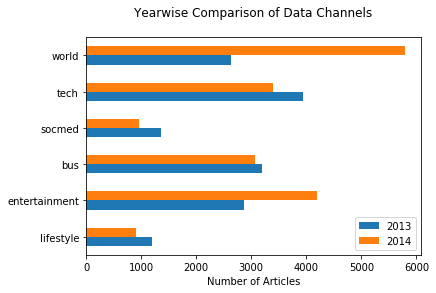

In [59]:
ydf_dc[['2013','2014']].plot(kind='barh')
plt.title('Yearwise Comparison of Data Channels\n')
plt.xlabel('Number of Articles')
plt.show()


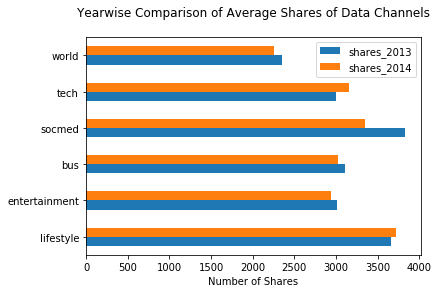

In [60]:

ydf_dc[['shares_2013','shares_2014']].plot(kind = 'barh')
plt.title('Yearwise Comparison of Average Shares of Data Channels\n')
plt.xlabel('Number of Shares')
plt.show()


## Inferences:


1. The articles published on saturdays and sundays or weekends seem to have more chances of becoming popular

2. The articles published on other days get considerable amount of popularity

3. So, to gain more popularity the number of articles published on weekends should be increased

4. lifestyle - mostly published on weekend,wednesday,thursday

5. entertainment - monday,wednesday,tuesday

6. business - wednesday,thursday,tuesday

7. social media - tuesday,wednesday,thursday

8. technology - tuesday,wednesday,thursday

9. world - wednesday,thursday,tuesday

10. Most of the articles are published on wednesday,thursday,tuesday

11. for each type of article, Saturday and sunday observed the least number of publications

12. on weekends articles published for all data channels is low except Lifestyle 

13. As it is observed that, weekend articles get more popularity, the articles should be published on that day

14. The articles published on weekdays (Monday, Tuesday and Wednesday) contribute an equal number of shares of 15%.
15. About 67% articles are popular among the articles that are published on weekends 
16. Articles of each data channel observed the least number of releases on weekends except Lifestyle 
17. The overall popularity of weekend articles is 15% among all the popular articles published on weekdays


18. For Yearwise comparision
    - The data channels world and entertainment observed a drastic increase in the number of articles published in the year 2014 as compared to 2013. 
    - Lifestyle and social media data channels have the highest average shares for both the years even though there is significant increase and decrease in average shares for the year 2014 respectively. 
    - The average shares for world data channel dropped in the year 2014 in spite of increase in the number of articles. 
    - We can say that, increasing the number of articles for a particular data channel does not contribute towards increase in number of shares or popularity.


##  Multicollinearity Check

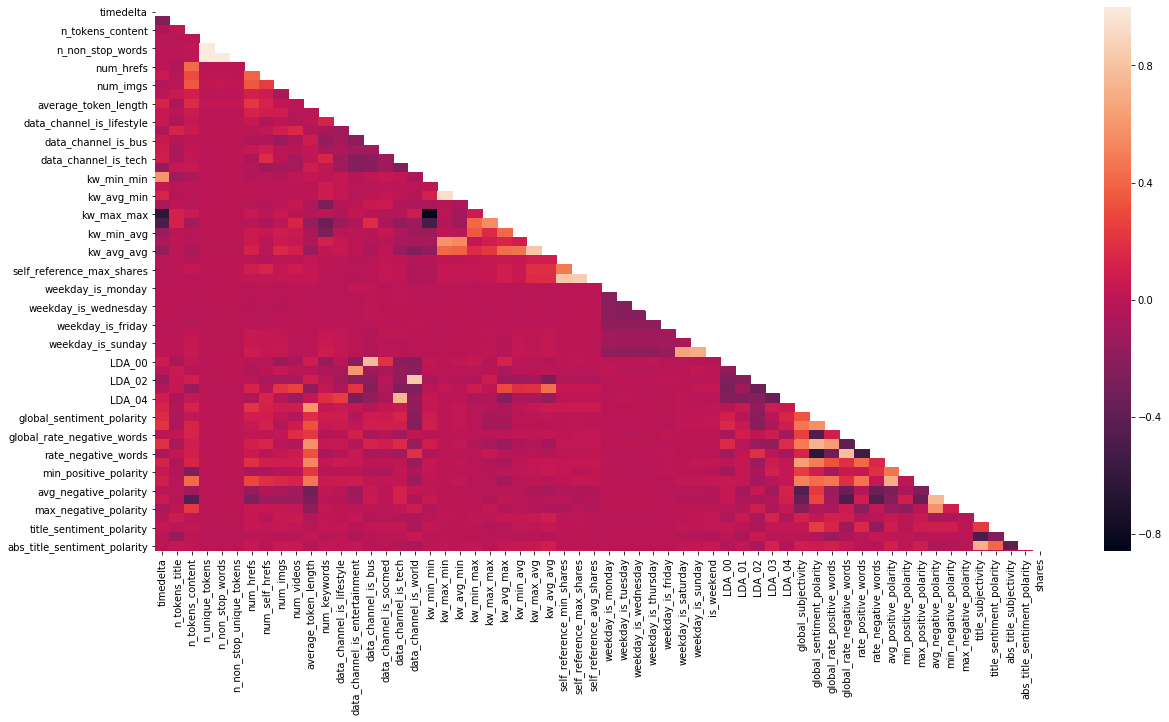

In [61]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20,10))
ax = sns.heatmap(df.corr(),mask = mask)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [64]:
### Get the highly correlated features

corr_val = ndf.corr()

correlated_features = set()
correlation_matrix = corr_val.drop('class', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(correlation_matrix.columns[j])
            correlated_features.add(colname)
            
print((correlated_features))

{'kw_max_min', 'global_subjectivity', 'kw_avg_min', 'title_subjectivity', 'self_reference_avg_shares', 'avg_positive_polarity', 'data_channel_is_world', 'n_unique_tokens', 'self_reference_max_shares', 'data_channel_is_tech', 'LDA_00', 'data_channel_is_bus', 'LDA_02', 'rate_negative_words', 'kw_max_max', 'global_sentiment_polarity', 'kw_min_min', 'rate_positive_words', 'LDA_04', 'self_reference_min_shares', 'n_non_stop_unique_tokens', 'timedelta', 'global_rate_negative_words', 'n_non_stop_words', 'abs_title_sentiment_polarity'}


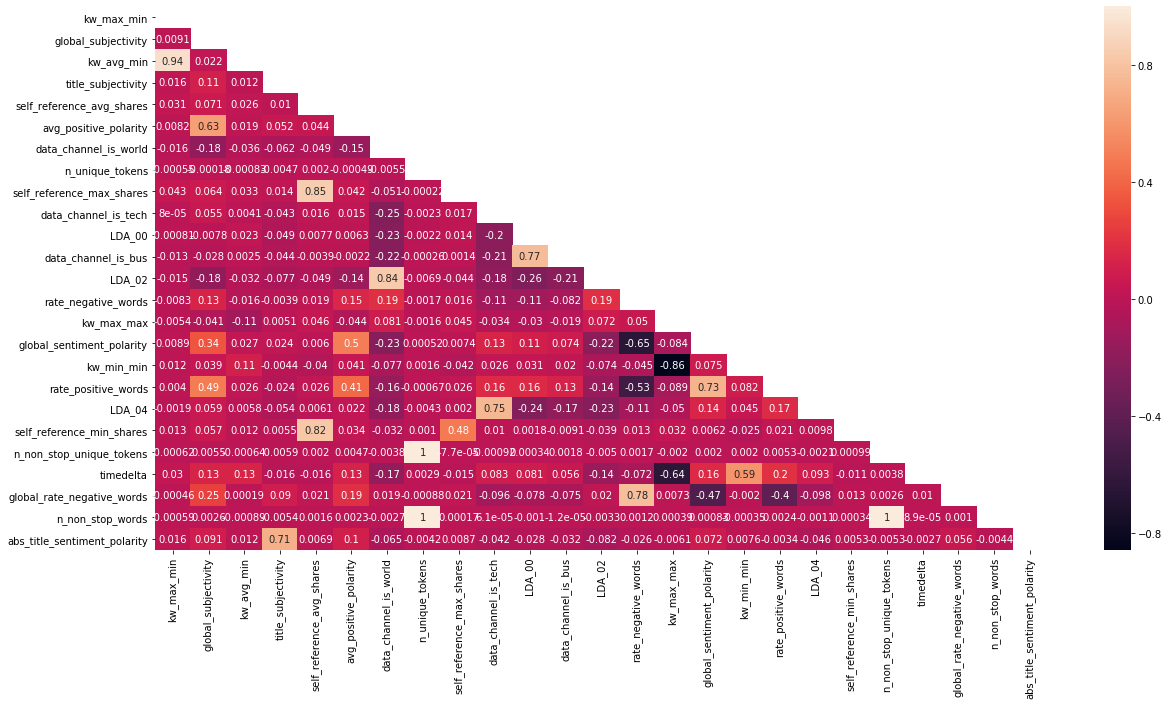

In [65]:
mask = np.zeros_like(df[correlated_features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20,10))
ax = sns.heatmap(df[correlated_features].corr(), annot = True,mask = mask)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Checking presence of outliers

In [66]:
ndf.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,topic,data_ch,class,days,date_published,year
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.187500,0.000000,0.187500,593,LDA_00,entertainment,0,monday,2013-01-07,2013
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.000000,0.500000,0.000000,711,LDA_00,business,0,monday,2013-01-07,2013
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.000000,0.500000,0.000000,1500,LDA_04,business,1,monday,2013-01-07,2013
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.000000,0.500000,0.000000,1200,LDA_02,entertainment,0,monday,2013-01-07,2013
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.136364,0.045455,0.136364,505,LDA_04,tech,0,monday,2013-01-07,2013


In [67]:
from scipy.stats import zscore

In [68]:
ndf1 = ndf.drop(['url','timedelta'], axis = 1)

In [71]:
unique_dict = {i:len(list(ndf[i].unique())) for i in df.columns[2:]}
sel_col = []
for i,k in unique_dict.items():
    if k > 2:
        sel_col.append(i)

In [72]:
# IQR METHOD

ul_val = []
ll_val = []
out_count = []


def limits(col):
    q1 = ndf[col].quantile(0.25)
    q3 = ndf[col].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5 * iqr
    ll = q1 - 1.5 * iqr
    ul_val.append(ul)
    ll_val.append(ll)
    uc = ndf[ndf[col]>ul].shape[0]
    lc = ndf[ndf[col]<ll].shape[0]
    out_count.append(uc+lc)
    
for i in sel_col:
    limits(i)
    
a = pd.DataFrame({'features': sel_col, 'upper_limit': ul_val, 'lower_limit': ll_val,
              'count': out_count})

a['count'].sum()


112890

In [73]:
a

,features,upper_limit,lower_limit,count
0,n_tokens_title,16.500000,4.500000e+00,156
1,n_tokens_content,1421.000000,-4.590000e+02,1933
2,n_unique_tokens,0.815433,2.641326e-01,1604
3,n_non_stop_words,1.000000,1.000000e+00,2827
4,n_non_stop_unique_tokens,0.947965,4.324041e-01,1733
5,num_hrefs,29.000000,-1.100000e+01,2169
6,num_self_hrefs,8.500000,-3.500000e+00,2090
7,num_imgs,8.500000,-3.500000e+00,7703
8,num_videos,2.500000,-1.500000e+00,2946
9,average_token_length,5.419491,3.913752e+00,1681



## Inference:

- There a large number of outliers removing all of these may lead to loss of information
- Hence, none of the outliers are removed.

In [74]:
ndf.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,topic,data_ch,class,days,date_published,year
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.187500,0.000000,0.187500,593,LDA_00,entertainment,0,monday,2013-01-07,2013
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.000000,0.500000,0.000000,711,LDA_00,business,0,monday,2013-01-07,2013
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.000000,0.500000,0.000000,1500,LDA_04,business,1,monday,2013-01-07,2013
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.000000,0.500000,0.000000,1200,LDA_02,entertainment,0,monday,2013-01-07,2013
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.136364,0.045455,0.136364,505,LDA_04,tech,0,monday,2013-01-07,2013


# 9. Statistical Significance

### Categorical vs Categorical: Chi-square test

In [75]:
cat_cols = ndf.select_dtypes(include='object').columns
num_cols = ndf.select_dtypes(exclude='object').columns

unique_dict = {i:list(ndf[i].unique()) for i in cat_cols}

# Chi-square test for data channels and class
from scipy.stats import f_oneway,chi2_contingency,ttest_ind
from statsmodels.stats.proportion import proportions_ztest

stat,p,df,exp= chi2_contingency(pd.crosstab(ndf['data_ch'],ndf['class']).values)
print(p)

0.0



Observation:

- pvalue < 0.05 | reject null | thus, there is relation between data channels and class|conclude that, data channel is a significant variable for class



In [76]:
# Chi-square test for days and class
stat,p,df,exp= chi2_contingency(pd.crosstab(ndf['days'],ndf['class']).values)
print(p)


1.4685648729522652e-169



Observation:

- pvalue < 0.05 | reject null | thus, there is relation between days and class|conclude that, days is a significant variable for class



### Categorical vs Numerical

In [77]:

pval = []
results = {}

# SHAPIRO - H0: Data is normal | H1: Data is not normal
def shapiro_test(arr):
    for col in arr:
        tstat, p =  shapiro(ndf[col])
        pval.append(p)
    return pval


# Two sample ttest - independent samples (normal)
# H0: the means of both populations are equal | H1: the means are not equal.
def ttest_ind_test(arr):
    for i in arr:
            cl0 = ndf[ndf['class']==0][i]
            cl1 = ndf[ndf['class']==1][i]
            t, p = ttest_ind(cl0,cl1)
            pval.append(p)
    return pval


# Mannwhitneyu - when the independent variables are not normal
# H0: the distributions of both populations are equal | H1: the distributions are not equal.
def man_test(arr):
    for i in arr:
            cl0 = ndf[ndf['class']==0][i]
            cl1 = ndf[ndf['class']==1][i]
            t, p = mannwhitneyu(cl0,cl1)
            pval.append(p)
    return pval


In [78]:
pval = []
results = {}
shapiro_test(num_cols)
results.update({'features': num_cols, 'pvalue': pval})
pd.DataFrame(results)


C:\Users\Ankita\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,features,pvalue
0,timedelta,0.0
1,n_tokens_title,0.0
2,n_tokens_content,0.0
3,n_unique_tokens,0.0
4,n_non_stop_words,0.0
...,...,...
57,abs_title_subjectivity,0.0
58,abs_title_sentiment_polarity,0.0
59,shares,0.0
60,class,0.0



Observations: 
 
pvalues of all features < 0.05 | reject null | conclude data is not normal


In [79]:
# As the independent variables are not normal, performing mannwhitneyu test - 2 sample independent ttest
pval = []
results = {}

man_test(num_cols[:-1])

results.update({'features': num_cols[:-1], 'pvalue': pval})
pd.DataFrame(results)


,features,pvalue
0,timedelta,1.665628e-21
1,n_tokens_title,1.330869e-19
2,n_tokens_content,2.480246e-03
3,n_unique_tokens,9.330924e-20
4,n_non_stop_words,3.663712e-03
...,...,...
56,title_sentiment_polarity,1.667173e-29
57,abs_title_subjectivity,4.160587e-01
58,abs_title_sentiment_polarity,8.257103e-10
59,shares,0.000000e+00


Observations:

all features pvalue < 0.05 | reject null | all significant except negative polarity(avg,min,max) and abs_title_subjectivity

# 10. Checking for Class Imbalance

In [82]:
df1 = ndf.copy()

df1['class'] = df1['shares'].apply(lambda x: 1 if x>1400 else 0)

df1 = df1.drop('shares', axis = 1)

In [83]:
pd.crosstab(df1['class'],columns = ['number of records'])

col_0,number of records
class,
0,20082
1,19562


In [84]:
print('Distribution of classes in percent')
df1['class'].value_counts(normalize=True)*100

Distribution of classes in percent


0    50.655837
1    49.344163
Name: class, dtype: float64

## Inference:

- Here, each class (0 and 1) consists of almost equal number of records 50% and 49% respectively. 
- This indicates that there is not much differnce in the distribution of classes
- Hence, there is no problem of class imbalance for this dataset.

Distribution of classes in percent [0.50655837 0.49344163]


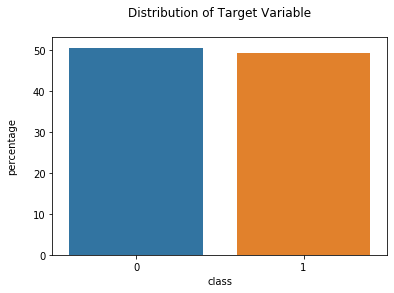

In [85]:
print('Distribution of classes in percent', df1['class'].value_counts(normalize=True).values)

sns.barplot(x = df1['class'].value_counts().index, y = df1['class'].value_counts(normalize=True)*100)
plt.title('Distribution of Target Variable\n')
plt.xlabel('class')
plt.ylabel('percentage\n')
plt.show()